## **Random Forest**



In [1]:
# Load libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import string 

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


from sklearn import preprocessing
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

import seaborn as sns

In [2]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

In [3]:
# Load Dataset

filename = 'Descripcion.xlsx'
DataSet0 = pd.read_excel(filename)
DataSet0


,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1460,Presentacion Moodle,1.053860e+09,No definido,NaN,NaN,NaN,SIGMA Ingeniería S.A,SIGMA
1,TIK1005,Revision Presentacion Aliado de Negocio JEEP,2.434445e+07,No definido,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
2,TIK1006,Se debe realizar la configuración de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
3,TIK1015,Análisis Calidad y verificaciones.,1.058818e+09,No definido,NaN,NaN,NR,Codensa,Geolumina
4,TIK7096,Capa predial Cartagena,2.434355e+07,No definido,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
...,...,...,...,...,...,...,...,...,...
13601,TIK11085,BARRA HERRAMIENTAS PENDIENTE VEHICULO,1.053771e+09,1- Nuevo requerimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
13602,TIK11506,Generar nueva app de conductor de bioagricola,1.059712e+09,1- Nuevo requerimiento,NaN,NaN,NR,Bioagrícola del Llano,Geoaseo
13603,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
13604,TIK11509,Creación de un usuario de consulta para la Con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [4]:
PorBorrar1 = DataSet0[DataSet0['descripcion'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'].isnull()].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
# PorBorrar1 = DataSet0[DataSet0['nombre_cliente'].isnull()].index
# DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
# PorBorrar1 = DataSet0[DataSet0['Linea_Negocio'].isnull()].index
# DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)

PorBorrar1 = DataSet0[DataSet0['categoria'] == '1- Nuevo requerimiento'].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)
PorBorrar1 = DataSet0[DataSet0['categoria'] == 'No definido'].index
DataSet0=DataSet0.drop(PorBorrar1, axis=0).reset_index(drop = True)

In [5]:
DataSet0['descripcion'] = DataSet0['descripcion'].str.lower()
DataSet0

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1006,se debe realizar la configuración de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
1,TIK1007,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
2,TIK1008,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
3,TIK1016,"construcción, mantenimiento y migración de la ...",1.053809e+09,Informes de reporte y mantenimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
4,TIK1020,publicación servicio geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
...,...,...,...,...,...,...,...,...,...
8314,TIK11494,"cordial saludo, adjunto la carga de tickets de...",1.059712e+09,Gestión de tickets de servicio,NaN,NaN,CD,Veolia (antiguo Grupo Sala),Geoaseo
8315,TIK11424,"por favor actualizar las capas de macros, micr...",1.059712e+09,Informes de reporte y mantenimiento,NaN,NaN,SS,Veolia (antiguo Grupo Sala),Geoaseo
8316,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
8317,TIK11509,creación de un usuario de consulta para la con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [6]:
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"á", "a")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"é", "e")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"í", "i")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ó", "o")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ú", "u")
DataSet0['descripcion'] = DataSet0['descripcion'].str.replace(u"ñ", "n")
DataSet0

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1006,se debe realizar la configuracion de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
1,TIK1007,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
2,TIK1008,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
3,TIK1016,"construccion, mantenimiento y migracion de la ...",1.053809e+09,Informes de reporte y mantenimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
4,TIK1020,publicacion servicio geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
...,...,...,...,...,...,...,...,...,...
8314,TIK11494,"cordial saludo, adjunto la carga de tickets de...",1.059712e+09,Gestión de tickets de servicio,NaN,NaN,CD,Veolia (antiguo Grupo Sala),Geoaseo
8315,TIK11424,"por favor actualizar las capas de macros, micr...",1.059712e+09,Informes de reporte y mantenimiento,NaN,NaN,SS,Veolia (antiguo Grupo Sala),Geoaseo
8316,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
8317,TIK11509,creacion de un usuario de consulta para la con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [7]:
punct = string.punctuation
for c in punct:
    DataSet0['descripcion'] = DataSet0['descripcion'].replace(c, " ")
# print(DataSet0['descripcion'] )
DataSet0

,tik_codigo,descripcion,propietario,categoria,modulo,producto,ans,nombre_cliente,Linea_Negocio
0,TIK1006,se debe realizar la configuracion de los servi...,1.607954e+07,Creación de servicios,NaN,NaN,NR,Cartagueña de Aseo Total ESP,Geoaseo
1,TIK1007,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
2,TIK1008,crear servicios geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
3,TIK1016,"construccion, mantenimiento y migracion de la ...",1.053809e+09,Informes de reporte y mantenimiento,NaN,NaN,NR,SIGMA Ingeniería S.A,SIGMA
4,TIK1020,publicacion servicio geoserver,2.434355e+07,Creación de servicios,NaN,NaN,NR,Llanogas,Geolumina
...,...,...,...,...,...,...,...,...,...
8314,TIK11494,"cordial saludo, adjunto la carga de tickets de...",1.059712e+09,Gestión de tickets de servicio,NaN,NaN,CD,Veolia (antiguo Grupo Sala),Geoaseo
8315,TIK11424,"por favor actualizar las capas de macros, micr...",1.059712e+09,Informes de reporte y mantenimiento,NaN,NaN,SS,Veolia (antiguo Grupo Sala),Geoaseo
8316,TIK11507,modificar perfil de rioaseo,1.059712e+09,Cambiar estado de OT,NaN,NaN,SS,Rio Aseo Total ESP,Geoaseo
8317,TIK11509,creacion de un usuario de consulta para la con...,7.510752e+07,Creación / inactivación de usuario,NaN,NaN,SS,CAR Magdalena,Geoambiental


In [8]:
patterns_labels = ['Configuración GPS',
                    'Revisión de formularios',
                    'Auditoria del sistema / interrupción completa de servicio',
                    'Informes de reporte y mantenimiento',
                    'Configuración de visor',
                    'Creación / inactivación  de usuario',
                    'Datos erróneos en reporte / actualización de reportes',
                    'Disminución de desempeño de plataforma',
                    'Carga de datos masiva, gestión de tickets',
                    'No envia el backup de app móvil / no cargan datos en app',
                    'Cambiar datos por BD, Cambiar estado de OT',
                    'Capacitación de módulo o funcionalidad',
                    'Creación de servicios / publicación de servicios' ]


                   
                                     
patterns_colors = ['indigo', 'tab:orange', 'maroon', 'tab:olive' , 'tab:brown' , 'lawngreen',
                  'tab:pink' ,'r', 'g', 'b', 'c' , 'm' , 'y'] # 'k' , '#6E2C00']


correct_Pattern_labels = DataSet0['categoria'].values

DataSet0 = DataSet0.drop(['tik_codigo','propietario', 'modulo', 'producto', 'ans'], axis=1)

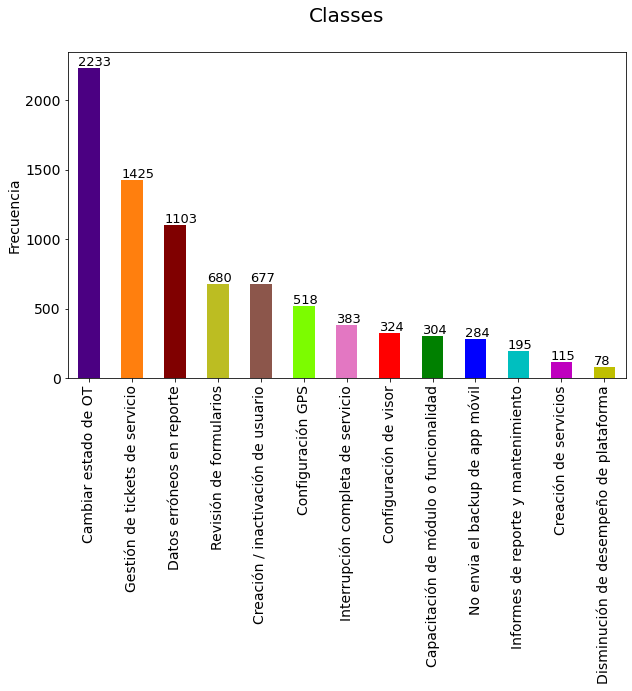

In [9]:
# class distribution
ax = DataSet0['categoria'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=14, color=patterns_colors)
# ax = DataSet['Classes'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 15, str(round(i.get_height(), 5)), fontsize=13)

In [29]:
# class distribution
print('DataSet category distrubution: \n')
print(DataSet0.groupby('categoria').size())

DataSet category distrubution: 

categoria
Cambiar estado de OT                      2233
Capacitación de módulo o funcionalidad     304
Configuración GPS                          518
Configuración de visor                     324
Creación / inactivación de usuario         677
Creación de servicios                      115
Datos erróneos en reporte                 1103
Disminución de desempeño de plataforma      78
Gestión de tickets de servicio            1425
Informes de reporte y mantenimiento        195
Interrupción completa de servicio          383
No envia el backup de app móvil            284
Revisión de formularios                    680
dtype: int64


In [30]:
X = DataSet0['descripcion']
y = DataSet0['categoria']

X

0       se debe realizar la configuracion de los servi...
1                              crear servicios geoserver 
2                              crear servicios geoserver 
3       construccion, mantenimiento y migracion de la ...
4                          publicacion servicio geoserver
                              ...                        
8314    cordial saludo, adjunto la carga de tickets de...
8315    por favor actualizar las capas de macros, micr...
8316                          modificar perfil de rioaseo
8317    creacion de un usuario de consulta para la con...
8318    solicito amablemente realizar el cargue de ope...
Name: descripcion, Length: 8319, dtype: object

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.20, random_state=42)

In [32]:
print(X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(8319,) (8319,) (6655,) (6655,) (1664,) (1664,)


In [33]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords.words("spanish"))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape, X_test.shape)

(6655, 3637) (1664, 3637)


In [15]:
print(X_train)

  (0, 2378)	0.5817150515835322
  (0, 3135)	0.563120100393816
  (0, 784)	0.49067333857674417
  (0, 2940)	0.3220916423994557
  (1, 203)	0.3527979930970905
  (1, 1684)	0.3527979930970905
  (1, 753)	0.34680239351280445
  (1, 2836)	0.34680239351280445
  (1, 2486)	0.3156798771821313
  (1, 186)	0.13930510566615498
  (1, 388)	0.29388043061563307
  (1, 1420)	0.16576322570278063
  (1, 1683)	0.2974743722006057
  (1, 1250)	0.2805337480453097
  (1, 2413)	0.1720584946973376
  (1, 751)	0.25273870189452546
  (1, 2827)	0.13018961972049897
  (2, 1522)	0.22223525744209657
  (2, 3389)	0.2359409869316606
  (2, 1456)	0.2359409869316606
  (2, 1122)	0.24373680458681532
  (2, 2035)	0.24373680458681532
  (2, 2623)	0.24373680458681532
  (2, 3109)	0.20551549142937162
  (2, 167)	0.16521150531917836
  :	:
  (6651, 1608)	0.42789288121843827
  (6651, 2779)	0.38600547636149735
  (6651, 784)	0.3966286516627921
  (6652, 1293)	0.43779087576489356
  (6652, 3253)	0.39388272732343227
  (6652, 290)	0.3369077707293135
  (6652

### RF technique without balancing and without parameter optimization

In [16]:
clf = RandomForestClassifier() 

clf.fit(X_train,y_train)
predicted_labels = clf.predict(X_test)
# conf = confusion_matrix(y_test, predicted_labels)


print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Accuracy: 0.7872596153846154
F1 score: 0.7827907417350499
Recall: 0.7872596153846154
Precision: 0.7902312955568569

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.71      0.86      0.78       457
Capacitación de módulo o funcionalidad       0.89      0.75      0.81        52
                     Configuración GPS       0.82      0.93      0.87       105
                Configuración de visor       0.67      0.55      0.61        65
    Creación / inactivación de usuario       0.83      0.89      0.86       141
                 Creación de servicios       0.92      0.85      0.88        26
             Datos erróneos en reporte       0.80      0.74      0.77       210
Disminución de desempeño de plataforma       0.75      0.47      0.58        19
        Gestión de tickets de servicio       0.90      0.84      0.87       287
   Informes de reporte y mantenimiento       0.88      0.68

###  RF technique without balancing and with parameter optimization

In [17]:
#OPTIMIZACIÓN CON GRID SEARCH PARA RandomForestClassifier()

RF = RandomForestClassifier(random_state = 1)# clasificador Random Forest


n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


RF_GridS = GridSearchCV(RF, parameters, cv = 3, verbose = 1, 
                      n_jobs = -1)

RF_GridS.fit(X_train, y_train) 

print(RF_GridS.best_params_,RF_GridS.best_score_) 

y_pred_acc = RF_GridS.predict(X_test)


# New Model Evaluation metrics 

print('Accuracy Score : ' ,accuracy_score(y_test,y_pred_acc))
print('Precision Score : ' ,precision_score(y_test,y_pred_acc, average = 'weighted'))
print('Recall Score : ' ,recall_score(y_test,y_pred_acc, average = 'weighted'))
print('F1 Score : '  ,f1_score(y_test,y_pred_acc, average = 'weighted'))
print ('\n clasification report:\n', classification_report(y_test, y_pred_acc))

print(confusion_matrix(y_test, y_pred_acc))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 55.8min finished


{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200} 0.7101437526252562
Accuracy Score :  0.7265625
Precision Score :  0.7864026086993309
Recall Score :  0.7265625
F1 Score :  0.7183554663502844

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.55      0.90      0.68       457
Capacitación de módulo o funcionalidad       1.00      0.65      0.79        52
                     Configuración GPS       0.83      0.90      0.86       105
                Configuración de visor       0.74      0.45      0.56        65
    Creación / inactivación de usuario       0.85      0.88      0.86       141
                 Creación de servicios       1.00      0.19      0.32        26
             Datos erróneos en reporte       0.92      0.69      0.78       210
Disminución de desempeño de plataforma       1.00      0.11      0.19        19
        Gestión de ticket

###  Applying data balancing with SMOTE library

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

ANTES DE BALANCEO - DATA DE ENTRENAMIENTO: 


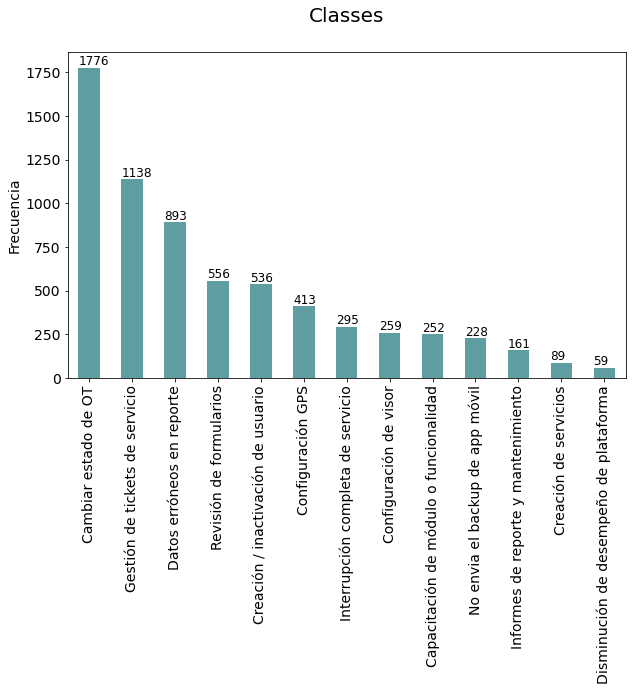

In [16]:
print("ANTES DE BALANCEO - DATA DE ENTRENAMIENTO: ")
ax = y_train.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=14, color='cadetblue')
# ax = DataSet['Classes'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 15, str(round(i.get_height(), 2)), fontsize=12)

###  Applying oversampling with SMOTE to the dataset 

In [17]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train) 
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (8319,)
Shape of X after SMOTE: (23088, 3637)

Balance of positive and negative classes (%):


Cambiar estado de OT                      7.692308
No envia el backup de app móvil           7.692308
Creación / inactivación de usuario        7.692308
Disminución de desempeño de plataforma    7.692308
Configuración de visor                    7.692308
Capacitación de módulo o funcionalidad    7.692308
Gestión de tickets de servicio            7.692308
Revisión de formularios                   7.692308
Configuración GPS                         7.692308
Creación de servicios                     7.692308
Interrupción completa de servicio         7.692308
Datos erróneos en reporte                 7.692308
Informes de reporte y mantenimiento       7.692308
Name: categoria, dtype: float64

###  RF technique with oversampling and without parameter optimization 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

classifier = RandomForestClassifier() 
classifier.fit(X_train, y_train)    
preds = classifier.predict(X_test)    

cm = confusion_matrix(y_test, preds)

print('Pattern classification accuracy = %f' % accuracy(cm))
print ('Accuracy:', accuracy_score(y_test, preds))
print ('F1 score:', f1_score(y_test, preds,average='weighted'))
print ('Recall:', recall_score(y_test, preds, average='weighted'))
print ('Precision:', precision_score(y_test, preds, average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, preds))
print ('\n confussion matrix:\n',confusion_matrix(y_test, preds))

Pattern classification accuracy = 0.950624
Accuracy: 0.9506237006237006
F1 score: 0.950593753962437
Recall: 0.9506237006237006
Precision: 0.9513793315040451

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.76      0.80      0.78       438
Capacitación de módulo o funcionalidad       0.98      0.98      0.98       447
                     Configuración GPS       0.96      0.99      0.98       467
                Configuración de visor       0.96      0.98      0.97       414
    Creación / inactivación de usuario       0.94      0.98      0.96       446
                 Creación de servicios       0.98      1.00      0.99       457
             Datos erróneos en reporte       0.93      0.85      0.89       426
Disminución de desempeño de plataforma       0.98      0.99      0.99       436
        Gestión de tickets de servicio       0.96      0.88      0.92       425
   Informes de re

###  RF technique with oversampling and with parameter optimization 

In [20]:
RF = RandomForestClassifier(random_state = 1)


n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


RF_GridS = GridSearchCV(RF, parameters, cv = 3, verbose = 1, 
                      n_jobs = -1)

RF_GridS.fit(X_train, y_train)

print(RF_GridS.best_params_,RF_GridS.best_score_)

y_pred_acc = RF_GridS.predict(X_test)


# New Model Evaluation metrics 

print('Accuracy Score : ' ,accuracy_score(y_test,y_pred_acc))
print('Precision Score : ' ,precision_score(y_test,y_pred_acc, average = 'weighted'))
print('Recall Score : ' ,recall_score(y_test,y_pred_acc, average = 'weighted'))
print('F1 Score : '  ,f1_score(y_test,y_pred_acc, average = 'weighted'))
print ('\n clasification report:\n', classification_report(y_test, y_pred_acc))

print(confusion_matrix(y_test, y_pred_acc))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 67.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 123.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 159.2min finished


{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200} 0.9101986601986601
Accuracy Score :  0.9187456687456688
Precision Score :  0.9236069117696885
Recall Score :  0.9187456687456688
F1 Score :  0.9193926358103539

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.63      0.76      0.69       438
Capacitación de módulo o funcionalidad       0.98      0.96      0.97       447
                     Configuración GPS       0.95      0.99      0.97       467
                Configuración de visor       0.95      0.97      0.96       414
    Creación / inactivación de usuario       0.92      0.96      0.94       446
                 Creación de servicios       0.93      0.98      0.96       457
             Datos erróneos en reporte       0.94      0.78      0.85       426
Disminución de desempeño de plataforma       0.97      1.00      0.98       436
       

DESPUÉS DE BALANCEO DATA DE ENTRENAMIENTO: 


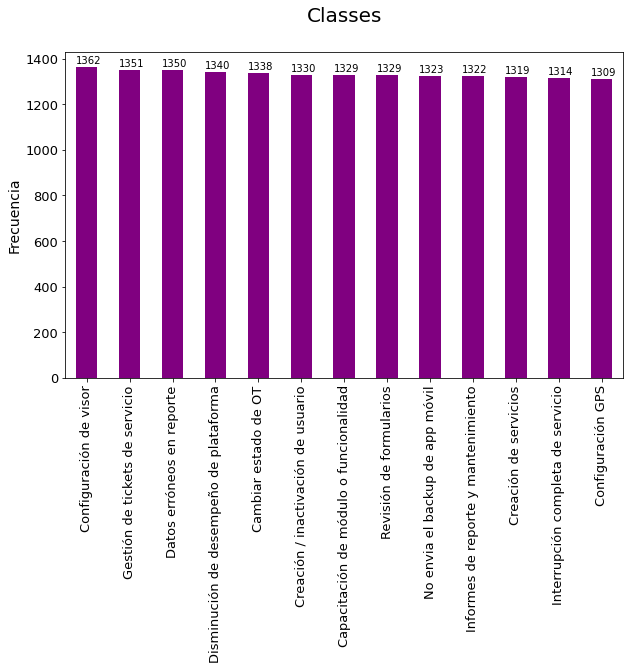

In [21]:
print("DESPUÉS DE BALANCEO DATA DE ENTRENAMIENTO: ")
ax = y_train.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='purple')
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 15, str(round(i.get_height(), 2)), fontsize=10)
    
#     X_sm, y_sm

###  Applying undersampling with NEAR MISS to the dataset 

In [35]:
from imblearn.under_sampling import NearMiss

In [36]:
#Applying NearMiss

undersample = NearMiss()#(version=1, n_neighbors=3)
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_train_us.value_counts())

Cambiar estado de OT                      1776
Gestión de tickets de servicio            1138
Datos erróneos en reporte                  893
Revisión de formularios                    556
Creación / inactivación de usuario         536
Configuración GPS                          413
Interrupción completa de servicio          295
Configuración de visor                     259
Capacitación de módulo o funcionalidad     252
No envia el backup de app móvil            228
Informes de reporte y mantenimiento        161
Creación de servicios                       89
Disminución de desempeño de plataforma      59
Name: categoria, dtype: int64
Cambiar estado de OT                      59
Configuración GPS                         59
Configuración de visor                    59
Creación / inactivación de usuario        59
Disminución de desempeño de plataforma    59
Capacitación de módulo o funcionalidad    59
Revisión de formularios                   59
Gestión de tickets de servicio            59

###  RF technique with undersampling and without parameter optimization

In [37]:
# After NearMiss

X_train, X_test, y_train, y_test = train_test_split(
    X_train_us, y_train_us, test_size=0.25, random_state=42
)

classifier = RandomForestClassifier() 
classifier.fit(X_train, y_train)      
preds = classifier.predict(X_test)    

cm = confusion_matrix(y_test, preds)

print('Pattern classification accuracy = %f' % accuracy(cm))
print ('Accuracy:', accuracy_score(y_test, preds))
print ('F1 score:', f1_score(y_test, preds,average='weighted'))
print ('Recall:', recall_score(y_test, preds, average='weighted'))
print ('Precision:', precision_score(y_test, preds, average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, preds))
print ('\n confussion matrix:\n',confusion_matrix(y_test, preds))

Pattern classification accuracy = 0.697917
Accuracy: 0.6979166666666666
F1 score: 0.7057306417204043
Recall: 0.6979166666666666
Precision: 0.7676260964912281

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.30      0.71      0.43        14
Capacitación de módulo o funcionalidad       1.00      0.68      0.81        19
                     Configuración GPS       1.00      0.86      0.92        14
                Configuración de visor       0.93      0.74      0.82        19
    Creación / inactivación de usuario       0.81      0.93      0.87        14
                 Creación de servicios       0.84      1.00      0.91        16
             Datos erróneos en reporte       1.00      0.38      0.55        16
Disminución de desempeño de plataforma       0.44      0.67      0.53        12
        Gestión de tickets de servicio       0.36      0.29      0.32        14
   Informes de r

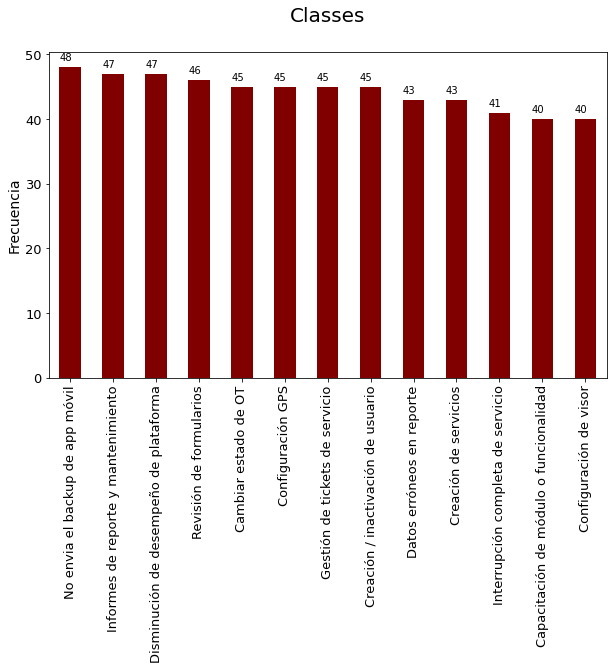

In [38]:
ax = y_train.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='maroon')
ax.set_title('Classes', size=20, pad=30)
ax.set_ylabel('Frecuencia', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() , i.get_height() + 1, str(round(i.get_height(), 2)), fontsize=10)
    
#     X_sm, y_sm

###  RF technique with undersampling and with parameter optimization

In [41]:
RF = RandomForestClassifier(random_state = 1) 


n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 


parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


RF_GridS = GridSearchCV(RF, parameters, cv = 3, verbose = 1, 
                      n_jobs = -1)

RF_GridS.fit(X_train, y_train) 

print(RF_GridS.best_params_,RF_GridS.best_score_) 

y_pred_acc = RF_GridS.predict(X_test)


# New Model Evaluation metrics 

print('Accuracy Score : ' ,accuracy_score(y_test,y_pred_acc))
print('Precision Score : ' ,precision_score(y_test,y_pred_acc, average = 'weighted'))
print('Recall Score : ' ,recall_score(y_test,y_pred_acc, average = 'weighted'))
print('F1 Score : '  ,f1_score(y_test,y_pred_acc, average = 'weighted'))
print ('\n clasification report:\n', classification_report(y_test, y_pred_acc))

print(confusion_matrix(y_test, y_pred_acc))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 21.4min finished


{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1200} 0.6888089005235601
Accuracy Score :  0.671875
Precision Score :  0.7157039860267655
Recall Score :  0.671875
F1 Score :  0.6715601851813474

 clasification report:
                                         precision    recall  f1-score   support

                  Cambiar estado de OT       0.31      0.29      0.30        14
Capacitación de módulo o funcionalidad       0.93      0.68      0.79        19
                     Configuración GPS       1.00      0.86      0.92        14
                Configuración de visor       1.00      0.74      0.85        19
    Creación / inactivación de usuario       0.68      0.93      0.79        14
                 Creación de servicios       0.76      1.00      0.86        16
             Datos erróneos en reporte       1.00      0.38      0.55        16
Disminución de desempeño de plataforma       0.35      0.58      0.44        12
        Gestión de tickets